In [1]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
#!pip install nc-time-axis

In [3]:
data_path = "data/processed_data_cse151b_v2_corrupted_ssp245/processed_data_cse151b_v2_corrupted_ssp245.zarr"
data = xr.open_zarr(data_path)
data

<xarray.Dataset> Size: 621MB
Dimensions:    (ssp: 4, time: 1021, latitude: 48, longitude: 72, x: 72, y: 48,
                member_id: 3)
Coordinates:
    lat        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * latitude   (latitude) float64 384B -89.05 -85.26 -81.47 ... 85.26 89.05
    lon        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * longitude  (longitude) float64 576B 1.25 6.25 11.25 ... 346.2 351.2 356.2
  * member_id  (member_id) int64 24B 0 1 2
  * ssp        (ssp) <U6 96B 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * time       (time) object 8kB 2015-01-15 00:00:00 ... 2100-01-15 00:00:00
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
Data variables:
    BC         (ssp, time, latitude, longitude) float64 113MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    CH4        (ssp, time) float64 33kB dask.array<chunksize=(1, 24), meta=np.ndarray>
    CO2        (ssp, time) float64 33kB dask.array<chunksize=(1, 24), meta=np.ndarray>
    SO2        (ssp, time, latitude, longitude) float64 113MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    pr         (ssp, time, member_id, y, x) float32 169MB dask.array<chunksize=(1, 24, 1, 48, 72), meta=np.ndarray>
    rsdt       (ssp, time, y, x) float32 56MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    tas        (ssp, time, member_id, y, x) float32 169MB dask.array<chunksize=(1, 24, 1, 48, 72), meta=np.ndarray>
Attributes:
    original_member_ids:  ['r10i1p1f1', 'r11i1p1f1', 'r4i1p1f1']
    precipitation_units:  mm/day (converted from kg m-2 s-1)
    source:               CMIP6 data processed for CSE151B
    ssp:                  ssp126

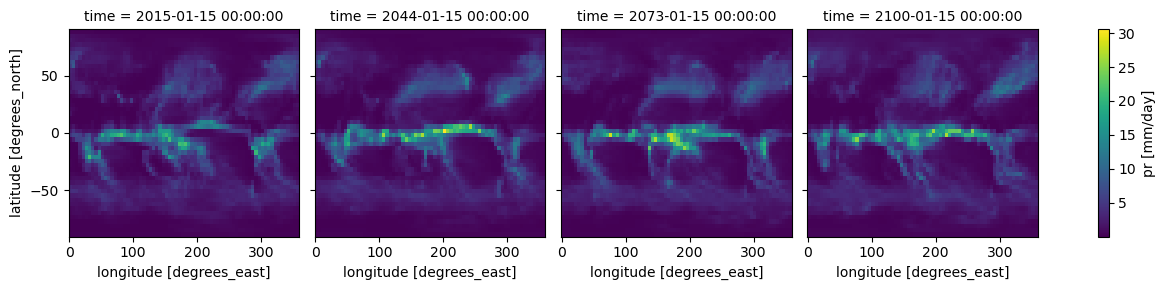

In [4]:
data_subset = data.isel(time=[0, 12*29, 12*29*2, -1]).sel(ssp="ssp126", member_id=2)
# data_subset.tas.plot(col="time")
# data_subset.pr.plot(col="time")

# data_subset = data.isel(time=[0, 12*29, 12*29*2, -1]).sel(ssp="ssp370", member_id=2)
# data_subset.tas.plot(col="time")
# data_subset.pr.plot(col="time")

data_subset = data.isel(time=[0, 12*29, 12*29*2, -1]).sel(ssp="ssp585", member_id=2)
# data_subset.tas.plot(col="time")
data_subset.pr.plot(col="time")


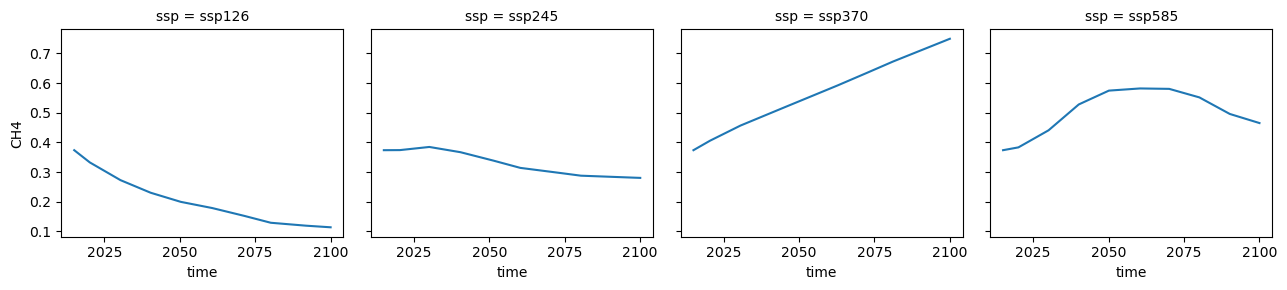

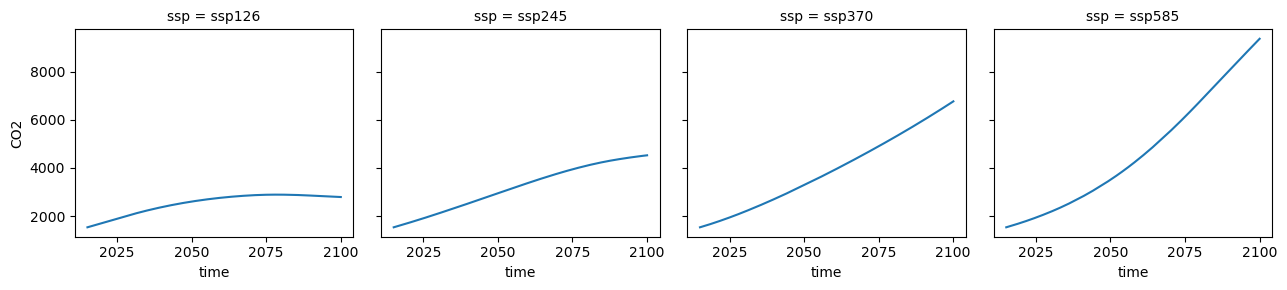

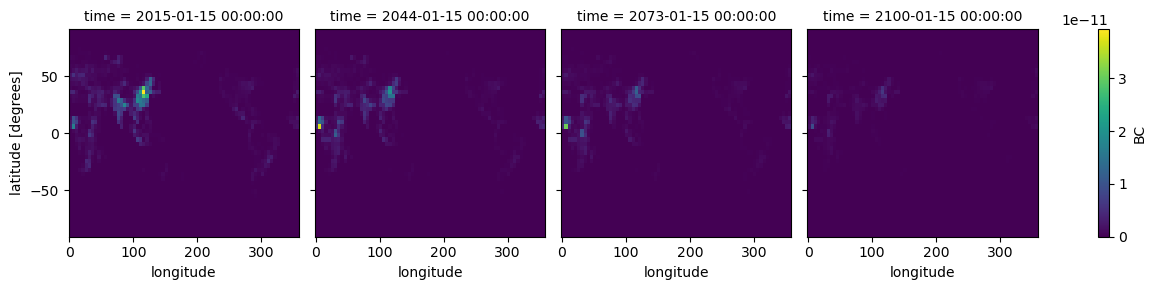

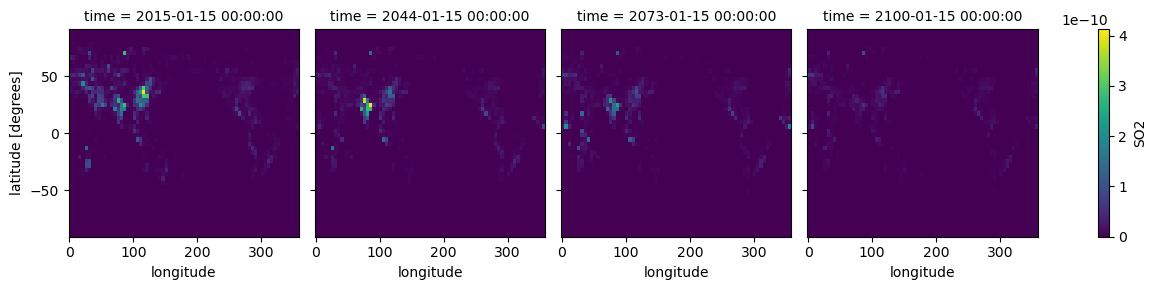

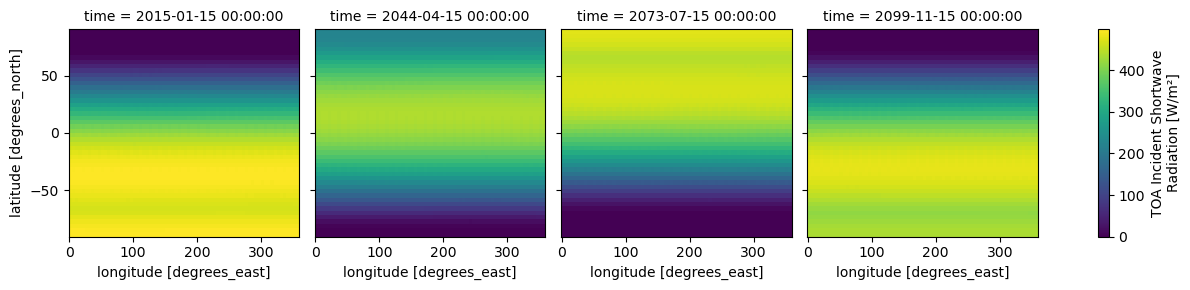

In [7]:
data_subset = data.isel()
data_subset.CH4.plot(col="ssp")
data_subset.CO2.plot(col="ssp")

data_subset = data.isel(time=[0, 12*29, 12*29*2, -1]).sel(ssp="ssp585")
data_subset.BC.plot(col="time")
data_subset.SO2.plot(col="time")
data_subset = data.isel(time=[0, 12*29+3, 12*29*2+6, -3]).sel(ssp="ssp370", member_id=2)
data_subset.rsdt.plot(col="time") #its seasonal lol




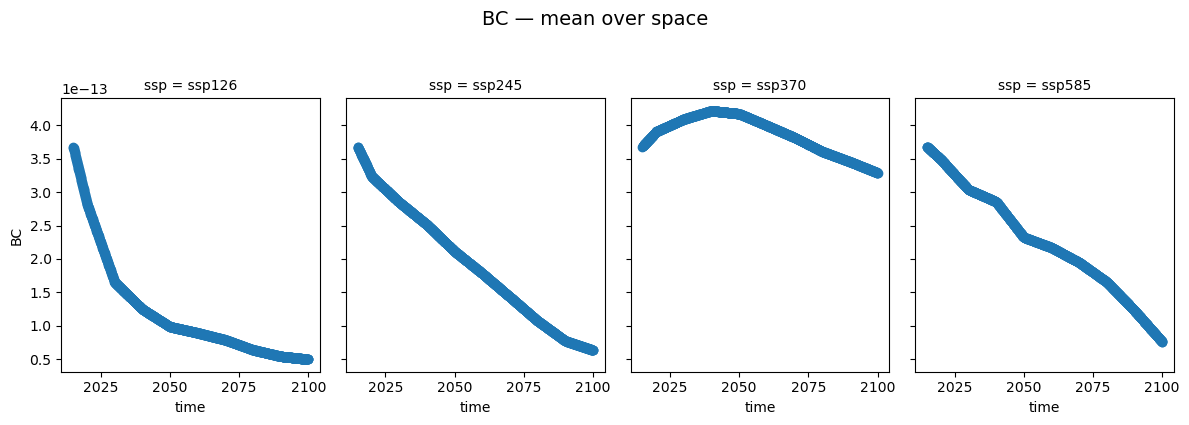

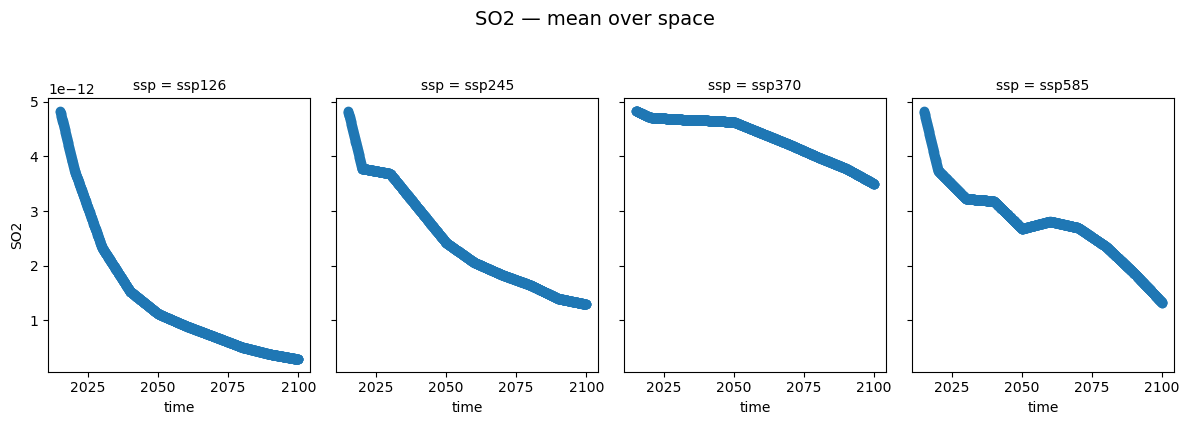

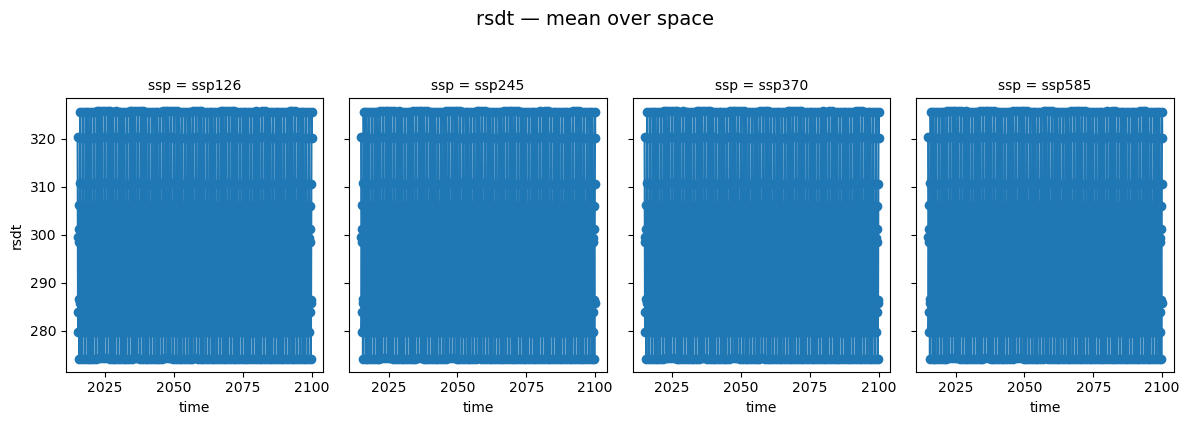

In [11]:
import matplotlib.pyplot as plt
import xarray as xr

# Select desired time steps
data_subset = data.isel()

# Loop through selected variables
for var in ["BC", "SO2", "rsdt"]:
    da = data_subset[var]

    # Check which spatial dims to average over
    spatial_dims = [dim for dim in da.dims if dim in ["latitude", "longitude", "y", "x"]]
    
    # Compute mean over spatial dimensions
    mean_da = da.mean(dim=spatial_dims)

    # Plot mean values vs time, faceted by SSP
    mean_da.plot.line(x="time", col="ssp", figsize=(12, 4), marker='o')
    plt.suptitle(f"{var} — mean over space", y=1.05, fontsize=14)
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Load dataset (replace this with your actual dataset path or object)
ds = xr.open_zarr(data_path)  # Example
# Plot histograms for all variables
for var in ds.data_vars:
    data = ds[var]
    
    # Flatten and compute
    flattened = data.values.ravel()
    
    # Remove NaNs
    flattened = flattened[~np.isnan(flattened)]

    # Plot
    plt.figure(figsize=(6, 4))
    plt.hist(flattened, bins=100, color='steelblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Load dataset (replace this with your actual dataset path or object)
ds = xr.open_zarr(data_path)  # Adjust this if you already have `ds`

for var in ds.data_vars:
    data = ds[var]

    try:
        # Flatten safely and compute
        flattened = data.data.flatten().compute()
        flattened = flattened[~np.isnan(flattened)]

        # Compute stats
        mean = np.mean(flattened)
        std = np.std(flattened)

        # Outliers: beyond 3 standard deviations from the mean
        outliers = flattened[(flattened < mean - 10*std) | (flattened > mean + 10*std)]
        num_outliers = len(outliers)

        # Print statistics
        print(f"\nVariable: {var}")
        print(f"  Mean: {mean:.4f}")
        print(f"  Std:  {std:.4f}")
        print(f"  Outliers (> 3 std): {num_outliers} / {len(flattened)}")

        # Plot
        plt.figure(figsize=(6, 4))
        plt.hist(flattened, bins=100, color='steelblue', edgecolor='black')
        plt.title(f'{var} (μ={mean:.2f}, σ={std:.2f}, outliers={num_outliers})')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Skipping variable {var} due to error: {e}")
